In [33]:
import zipfile
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

zip_path = 'YaleB'
extract_folder = 'YaleB'



folders = sorted([f for f in os.listdir(extract_folder) if os.path.isdir(os.path.join(extract_folder, f))])[:2]

image_arrays = []
for folder in folders:
    folder_path = os.path.join(extract_folder, folder)
    for filename in os.listdir(folder_path):
        if filename.endswith('.tif'):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                image_array = np.array(img)
                image_arrays.append(image_array)

images_np = np.array(image_arrays)

nsamples, nx, ny = images_np.shape
d2_images_np = images_np.reshape((nsamples, nx*ny))

scaler = StandardScaler()
images_std = scaler.fit_transform(d2_images_np)

pca = PCA(n_components=2)  
images_pca = pca.fit_transform(images_std)
len(images_pca)

130

In [34]:
import matplotlib.pyplot as plt

pca_20 = PCA(n_components=20)
images_pca_20 = pca_20.fit_transform(images_std)


In [35]:
#masale yek
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

labels = [1] * 65 + [2] * 65  

X_train, X_test, y_train, y_test = train_test_split(images_pca_20, labels, test_size=0.5, stratify=labels)

m_values = [19, 15, 11, 5, 3, 1]

accuracies = []

for m in m_values:
    pca = PCA(n_components=m)
    images_train_pca = pca.fit_transform(X_train)
    images_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(images_train_pca, y_train)

    predicted_labels = knn.predict(images_test_pca)
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracies.append(accuracy)

    print(f"Accuracy for M={m}: {accuracy * 100:.2f}%")



Accuracy for M=19: 93.85%
Accuracy for M=15: 93.85%
Accuracy for M=11: 92.31%
Accuracy for M=5: 78.46%
Accuracy for M=3: 86.15%
Accuracy for M=1: 44.62%


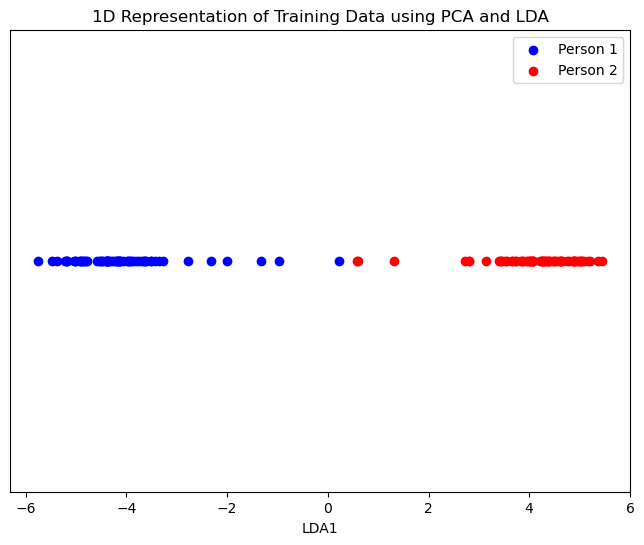

In [59]:
#masale do
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

labels = [1] * 65 + [2] * 65

pca = PCA(n_components=20)
images_pca_20 = pca.fit_transform(images_std)


lda = LDA(n_components=1)
images_lda_1d = lda.fit_transform(images_pca_20, labels)

plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for color, label in zip(colors, [1, 2]):
    indices = np.where(np.array(labels) == label)
    plt.scatter(images_lda_1d[indices], np.zeros_like(images_lda_1d[indices]), color=color, label=f'Person {label}')
plt.xlabel('LDA1')
plt.title('1D Representation of Training Data using PCA and LDA')
plt.yticks([]) 
plt.legend()
plt.show()

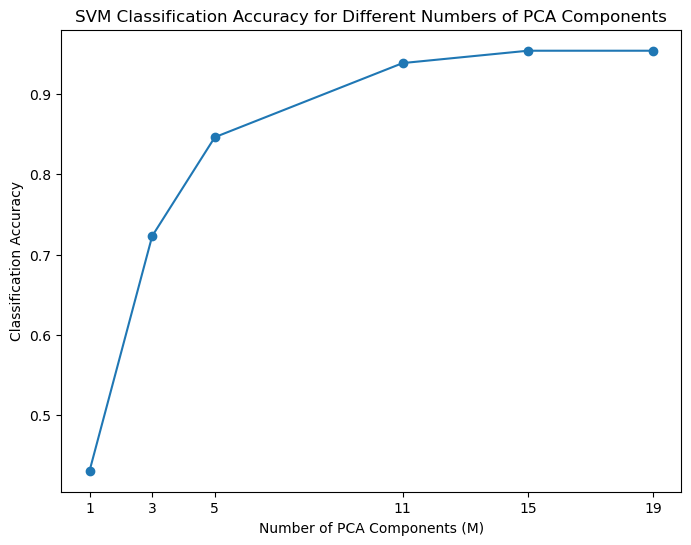

In [39]:
#masale 3 svm
pca_20 = PCA(n_components=20)
images_pca_20 = pca_20.fit_transform(images_std)
labels = [1] * 65 + [2] * 65  
X_train, X_test, y_train, y_test = train_test_split(images_pca_20, labels, test_size=0.5, stratify=labels)
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


m_values = [19, 15, 11, 5, 3, 1]

accuracies = []

for m in m_values:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svm = SVC()
    svm.fit(X_train_pca, y_train)

    predicted_labels = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracies.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(m_values, accuracies, marker='o')
plt.xlabel('Number of PCA Components (M)')
plt.ylabel('Classification Accuracy')
plt.title('SVM Classification Accuracy for Different Numbers of PCA Components')
plt.xticks(m_values)
plt.show()

In [40]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 516.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 1.7 MB/s eta 0:00:0000:0100:03


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 895.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 4.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 kB 7.9 MB/s eta 0:00:00


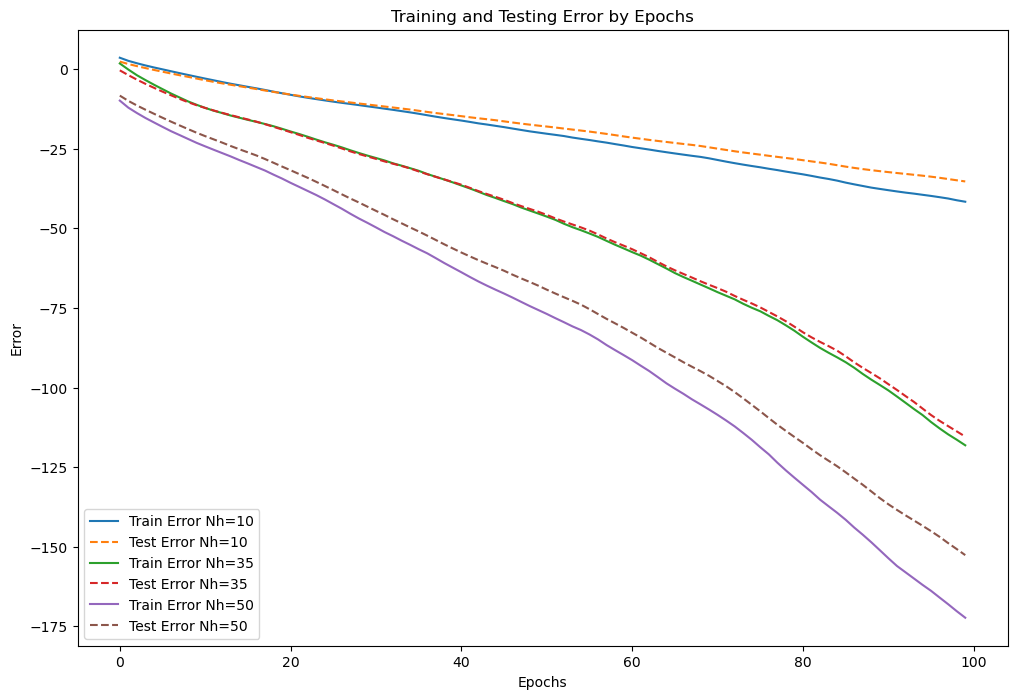

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


pca_20 = PCA(n_components=20)
images_pca_20 = pca_20.fit_transform(images_std)
labels = [1] * 65 + [2] * 65  
X_train, X_test, y_train, y_test = train_test_split(images_pca_20, labels, test_size=0.5, stratify=labels)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

def train_network(Nh, epochs=100):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(Nh, activation='relu', input_shape=(20,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train_np, epochs=epochs, validation_data=(X_test, y_test_np), verbose=0)

    return history


nh_values = [10, 35, 50]
history_dict = {}

for nh in nh_values:
    history = train_network(Nh=nh, epochs=100)
    history_dict[nh] = history

plt.figure(figsize=(12, 8))
for nh, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Error Nh={nh}')
    plt.plot(history.history['val_loss'], label=f'Test Error Nh={nh}', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Testing Error by Epochs')
plt.legend()
plt.show()